# Project: Kernelization, Kernel Tricks

**Put any package imports you need in the below space**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import pairwise_kernels

**Exercise 1: Generating the data sets.**

Write a script that generates three data sets in a 2-dimensional space, defined as follows:
1. BAD_kmeans: a data set for which the k-means clustering algorithm will not perform well.
2. BAD_pca: a data set for which the Principal Component Analysis (PCA) dimension reduction method upon projection of the original points onto 1-dimensional space (i.e., the first eigenvector) will not perform well.
3. BAD_svm: a data set for which the linear Support Vector Machine (SVM) supervised classification method using two classes of points (positive and negative)  will not perform well.
4. Plot each data set in a 2-dimensional space.
    
Note: If appropriate, the same data set may be used for multiple parts.

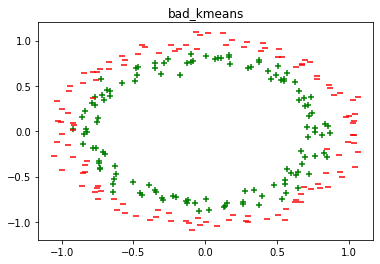

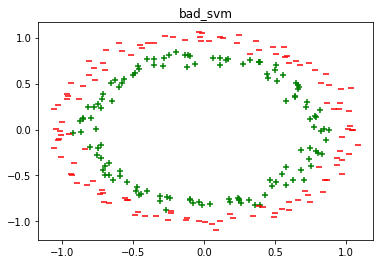

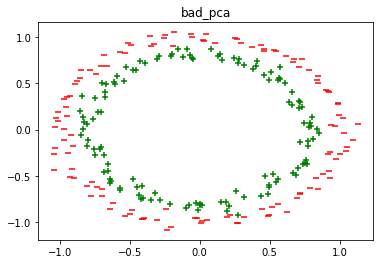

In [3]:
kmeans_data,kmeans_label = make_circles(n_samples=250, noise=.05)
plt.scatter(kmeans_data[kmeans_label==1][:,0], kmeans_data[kmeans_label==1][:,1], marker="+", color="green")
plt.scatter(kmeans_data[kmeans_label==0][:,0], kmeans_data[kmeans_label==0][:,1], marker="_", color="red")
plt.title("bad_kmeans")
plt.show()

svm_data,svm_label = make_circles(n_samples=250, noise=.05)
plt.scatter(svm_data[svm_label==1][:,0], svm_data[svm_label==1][:,1], marker="+", color="green")
plt.scatter(svm_data[svm_label==0][:,0], svm_data[svm_label==0][:,1], marker="_", color="red")
plt.title("bad_svm")
plt.show()

pca_data,pca_label = make_circles(n_samples=250, noise=.05)
plt.scatter(pca_data[pca_label==1][:,0], pca_data[pca_label==1][:,1], marker="+", color="green")
plt.scatter(pca_data[pca_label==0][:,0], pca_data[pca_label==0][:,1], marker="_", color="red")
plt.title("bad_pca")
plt.show()



**Exercise 2: Evaluating the "badness" of the data mining methods.**

Write a script that uses the BAD data sets in Exercise 1, runs the corresponding data mining method, produces the output of the method, and evaluates the performance of the method using (e.g., 10-fold) cross-validation and various performance metrics (e.g., variance, precision, recall, F1 measure). Note that not all metrics can be equally applied to every method. Report the performance metrics used and a summary of the results obtained. Reading the chapter “Performance Metrics for Graph Mining Tasks” by Kanchana Padmanabhan and John Jenkins in the resources for performance metrics is strongly encouraged for performing this exercise. 

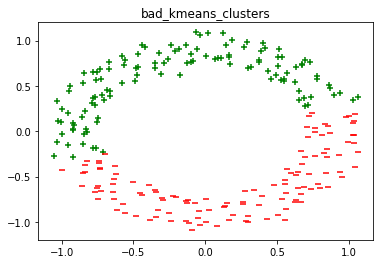

K_means score// 10 fold CV -14.500751500095387
K_means metrics               precision    recall  f1-score   support

           0       0.50      0.50      0.50       125
           1       0.50      0.50      0.50       125

    accuracy                           0.50       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.50      0.50      0.50       250



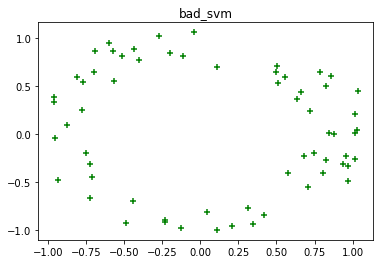

svm score 0.42857142857142855
svm metrics               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.43      1.00      0.60        27

    accuracy                           0.43        63
   macro avg       0.21      0.50      0.30        63
weighted avg       0.18      0.43      0.26        63

No. of support vectors:  [89 91]
10-fold cross validation score -1.9808985697709924
PCA variance: 0.5046907314339482


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
## evaluating k-means 
def kmeans_model(kmeans_data, kmeans_label):
  kmeans = KMeans(n_clusters=2, random_state=100)
  kmeans.fit(kmeans_data)
  kmeans_clusters = kmeans.predict(kmeans_data)
  plt.scatter(kmeans_data[kmeans_clusters==1][:,0], kmeans_data[kmeans_clusters==1][:,1], marker="+", color="green")
  plt.scatter(kmeans_data[kmeans_clusters==0][:,0], kmeans_data[kmeans_clusters==0][:,1], marker="_", color="red")
  plt.title("bad_kmeans_clusters")
  plt.show()

  kmeans_score = cross_val_score(kmeans, kmeans_data, kmeans_label, cv=10).mean()
  kmeans_metrics = classification_report(kmeans_label, kmeans_clusters)

  print("K_means score// 10 fold CV", kmeans_score )
  print("K_means metrics",kmeans_metrics)

## evaluating SVM
def svm_model(svm_data, svm_label):
  X_train, X_test, y_train, y_test = train_test_split(svm_data, svm_label, test_size=0.25, random_state=100)
  svm = SVC(kernel='linear')
  svm_class = svm.fit(X_train, y_train).predict(X_test)
  plt.scatter(X_test[svm_class==1][:,0], X_test[svm_class==1][:,1], marker="+", color="green")
  plt.scatter(X_test[svm_class==0][:,0], X_test[svm_class==0][:,1], marker="_", color="red")
  plt.title("bad_svm")
  plt.show()
  svm_score = svm.score(X_test,y_test)
  svm_metrics = classification_report(y_test, svm_class)
  print("svm score", svm_score )
  print("svm metrics",svm_metrics)
  print("No. of support vectors: ",svm.n_support_)
## evaluating PCA
def pca_model(pca_data,pca_label):
    pca = PCA(1)
    pca.fit(pca_data)
    pca_score = cross_val_score(pca, pca_data, pca_label, cv=10).mean()
    print("10-fold cross validation score", pca_score)
    print("PCA variance:", pca.explained_variance_ratio_[0])



###
kmeans_model(kmeans_data, kmeans_label)
svm_model(svm_data, svm_label)
pca_model(pca_data,pca_label)

**Exercise 3: Kernelizing the methods.**

Write a script that uses the kernelized version of each of the data mining methods in Exercise 2.
1. Choose at least two kernels for each method.
2. Use the same performance metrics as in Exercise 2 and compare the performance of the original un-kernelized version of the method versus the performance obtained after applying the kernel trick.
3. Do you observe a difference in performance when you use different kernels?
4. What are the best performance results you obtain by trying different kernels and kernel parameters? Also, make sure to report the number of support vectors for the SVM (a good rule of thumb is to strive for no more than 35%-50% support vectors to avoid model overfitting).

poly kernels on k-means


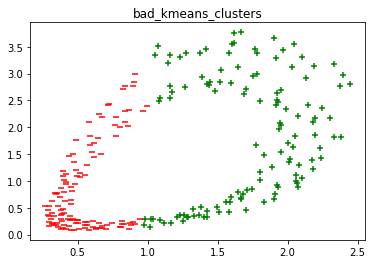

K_means score// 10 fold CV -3991.3305373227763
K_means metrics               precision    recall  f1-score   support

           0       0.50      0.50      0.50       125
           1       0.50      0.50      0.50       125

    accuracy                           0.50       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.50      0.50      0.50       250

RBF kernels on k-means


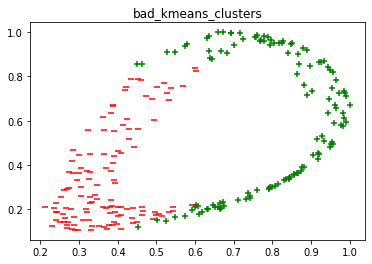

K_means score// 10 fold CV -347.9975155531621
K_means metrics               precision    recall  f1-score   support

           0       0.50      0.50      0.50       125
           1       0.50      0.50      0.50       125

    accuracy                           0.50       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.50      0.50      0.50       250



In [5]:
## K-means 

## poly kernels on k-means
print("poly kernels on k-means")
kmeans_poly_kernel = pairwise_kernels(kmeans_data, metric="poly")
kmeans_model(kmeans_poly_kernel, kmeans_label)

## Radial basis function kernel 
print("RBF kernels on k-means")
kmeans_poly_kernel = pairwise_kernels(kmeans_data, metric="rbf")
kmeans_model(kmeans_poly_kernel, kmeans_label)




RBF kernels on svm


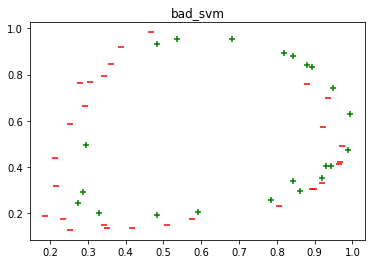

svm score 0.98
svm metrics               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

No. of support vectors:  [15 17]
poly kernels on svm


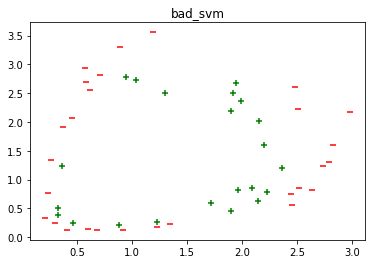

svm score 0.98
svm metrics               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

No. of support vectors:  [11 12]


In [6]:
## SVM
## poly kernels on svm
print("RBF kernels on svm")
svm_poly_kernel = pairwise_kernels(svm_data, metric="rbf")
svm_model(svm_poly_kernel, svm_label)
## poly kernels on svm
print("poly kernels on svm")
svm_poly_kernel = pairwise_kernels(svm_data, metric="poly")
svm_model(svm_poly_kernel, svm_label)




In [7]:
## PCA
## poly kernels on PCA
print("RBF kernels on PCA")
pca_poly_kernel = pairwise_kernels(pca_data, metric="rbf")
pca_model(pca_poly_kernel, pca_label)

## poly kernels on PCA
print("poly kernels on PCA")
pca_poly_kernel = pairwise_kernels(pca_data, metric="poly")
pca_model(pca_poly_kernel, pca_label)


RBF kernels on PCA
10-fold cross validation score 31.94347396823261
PCA variance: 0.4822624068292623
poly kernels on PCA
10-fold cross validation score -277.655833447564
PCA variance: 0.4849285627527002


3. Do you observe a difference in performance when you use different kernels?

  Answer : Yes, We obeserve that PCA variance is high for polynomial kernel. K-means has no effect for different kernels and SVM is improved when kernalized from polynomial to RBF.

4. What are the best performance results you obtain by trying different kernels and kernel parameters?
  Answer: SVM has the best performance results by trying different kernels.

**Exercise 4: Pipelining.**

Dimension reduction is often used as a key data pre-processing step for other data mining methods downstream the end-to-end data analysis. In this exercise, you will use unsupervised kernel PCA as a pre-processing step for clustering. Later in the course, we will use supervised dimension reduction methods as a pre-processing step for supervised classification methods.
1. Generalize your BAD_kmeans data set to very high-dimensional space (d>>2).
2. Show that the k-means clustering algorithm does not perform well on that data.
3. Apply the kernel PCA method to this high dimensional data set and identify the number (m<<d) of principal components (i.e., eigenvectors) that provide a reasonably good low-dimensional approximation of your data (i.e., based on eigenvalue distribution). How much total variability of the data will be preserved upon using this low-dimensional representation?
4. Project your original data onto the top m eigenvectors corresponding to the largest eigenvalues.


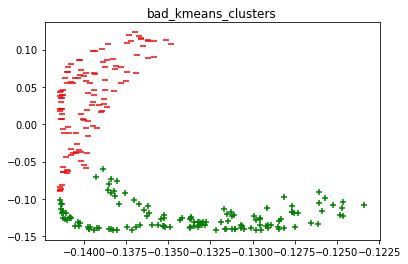

K_means score// 10 fold CV -12.23202883681737
K_means metrics               precision    recall  f1-score   support

           0       0.49      0.46      0.48       125
           1       0.49      0.51      0.50       125

    accuracy                           0.49       250
   macro avg       0.49      0.49      0.49       250
weighted avg       0.49      0.49      0.49       250

10-fold cross validation score 1000.8015807724694
PCA variance: 0.5447278402932617
The data representation of m = 5 0.9900067709419558


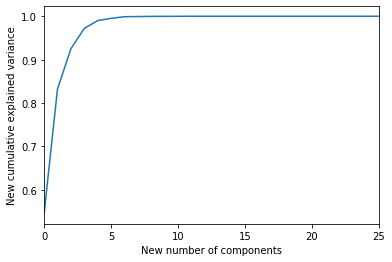

In [8]:
from sklearn.kernel_approximation import RBFSampler

## k-means high dimensional space 
rbfsampler = RBFSampler(n_components=100)
high_kmeans_data = rbfsampler.fit_transform(kmeans_data)
kmeans_model(high_kmeans_data, kmeans_label)

#RBF  kernel PCA
new_kernel = pairwise_kernels(high_kmeans_data, metric="rbf")
new_pca = PCA().fit(new_kernel)
pca_model(new_kernel,pca_label)

m5_sum = sum(new_pca.explained_variance_ratio_[:5])

print("The data representation of m = 5",m5_sum)

# Project the largest eigenvalues
plt.plot(np.cumsum(new_pca.explained_variance_ratio_))
plt.xlabel('New number of components')
plt.xlim(0,25)
plt.ylabel('New cumulative explained variance')
plt.show()



5. Run the k-means clustering algorithm on the projected low dimensional data.
6. Compare the performance of the k-means clustering algorithm on the d-dimensional original data vs. the m-dimensional projected data. Has the performance improved?

  Answer: k-menas on the m- dimensional is better than the d-dimensional data.

7. If you run the kernel k-means clustering algorithm on the original data, will you get better or worse performance? Discuss the pros and cons of using kernel k-means on the original data directly versus applying kernel PCA as a pre-processing step and then running the k-means clustering algorithm on the low-dimensional data?

  Answer: If we directly apply kernel k-means on the original data the performance is not good because ther are more dimensions and noise in the data. It takes more computational power to run on huge data.
  
  If we use Kernel PCA on the data, the dimesionality of the data reduces decreasing the complexity of the data. 


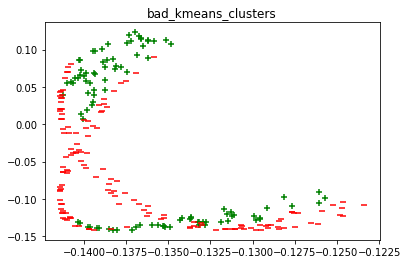

K_means score// 10 fold CV -0.4359509088961523
K_means metrics               precision    recall  f1-score   support

           0       0.55      0.66      0.60       125
           1       0.58      0.46      0.51       125

    accuracy                           0.56       250
   macro avg       0.56      0.56      0.56       250
weighted avg       0.56      0.56      0.56       250



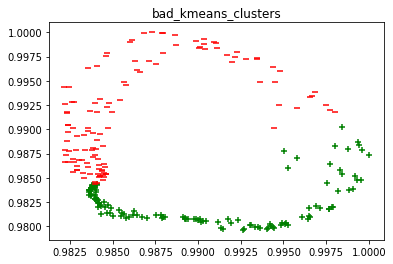

K_means score// 10 fold CV -0.14801116897496938
K_means metrics               precision    recall  f1-score   support

           0       0.49      0.48      0.48       125
           1       0.49      0.50      0.49       125

    accuracy                           0.49       250
   macro avg       0.49      0.49      0.49       250
weighted avg       0.49      0.49      0.49       250



In [9]:
## kmeans low dimensional space
m = 5
low_data=[]
for d in high_kmeans_data:
  low_data.append(d[0:5])
kmeans_model(np.asarray(low_data), kmeans_label)

# Apply kernelized k means with rbf kernel

kmeans_model(pairwise_kernels(high_kmeans_data, metric="rbf"), kmeans_label)